# CIS 678 Project #2: Prediction

By: Hailey Siwek and Kyle Kane

### Introduction

For this project, the algorithm serves as a prediction system that predicts the protein expression profile (25) of proteins in 1,000 test cells given the gene expression of 639 genes in those cells. The algorithm uses deep learning with a Pytorch implementation to accomplish this prediciton task. The data set underwent preprocessing and a neural network composed of two hidden layers that utilized principle component analysis (PCA).

### Approach

1. Linear multivariate implementation
2. Basic deep learning implementation with numpy
3. More complex deep learning implementation using pytorch
4. Hyperparameter tuning to determine the optimal prediction algorithm

### Approach Step 1: Linear Multivariation Implementation

In the linear multivariation approach, the data was to be preprocessed, and the linear multivariation was to be applied using the Normal Equation formula for linear regression, along with the addition of a bias term. The Normal Equation is displayed below in Equation 1, where X is the matrix of RNA expression data when the bias term has been applied, Y is the matrix of protein expression data, and B (representing beta) is the vector of model coefficients.

Equation 1.   B=(X^(T)X)^(-1)X^(T)Y

Predictions for protein expressions are to be made by multiplying the test RNA data with the calculated B (beta) coefficients. Any unexpected non numerical values (NaN) will be converted to zeroes.

In [ ]:
import pandas as pd
import numpy as np

# Load datasets
test_rna = pd.read_csv('test_set_rna.csv', skip_blank_lines=True)
training_rna = pd.read_csv('training_set_rna.csv', skip_blank_lines=True)
training_protein = pd.read_csv('training_set_adt.csv', skip_blank_lines=True)

# Drop any completely empty columns if present
test_rna = test_rna.dropna(axis=1, how='all')
training_rna = training_rna.dropna(axis=1, how='all')
training_protein = training_protein.dropna(axis=1, how='all')

# Preprocess the data
X_train = training_rna.set_index('Unnamed: 0').T
Y_train = training_protein.set_index('Unnamed: 0').T
X_test = test_rna.set_index('Unnamed: 0').T

# Align features between training and test data
common_genes = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_genes].values
X_test = X_test[common_genes].values

# Multivariate Linear Regression implementation without ML libraries
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) # add bias term of 1
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Calculate coefficients using the Normal Equation
XTX_inv = np.linalg.inv(X_train.T @ X_train)
Beta = XTX_inv @ X_train.T @ Y_train.values

# Predict protein expressions
predicted_proteins = X_test @ Beta

# Ensure no NaN values in predictions
predicted_proteins = np.nan_to_num(predicted_proteins)

### Results & Discussion for Step 1

In the linear multivariation implementation, the data was preprocessed, and linear multivariation was applied using the Normal Equation formula for linear regression. A bias term of 1 was added to the training and testing datasets. The coefficients were identified in the calculation that, when multiplied by the test data, identify the protein expression predictions. Hyperparameter tuning and experimentation within this model was minimal, as we operated under the assumption that a deep learning implementation had greater capability for protein expression prediction within this project. The best kaggle score obtained with this implementation was 0.80225.

### Approach Step 2: Basic Numpy Implementation

For the basic numpy approach, the data was to be preprocessed for feature alignment. Standardization was to be imposed on the train and test data in order to improve the model performance. The mean and standard deviation are used for both the train and test data to ensure consistency. Iterative plot generation of MSE vs epochs was to be conducted for identifying optimal hyper parameters. The lower the MSE at certain epochs was, the more better the hyper parameters fit together for forming a protein expressions prediction for the current algorithm.

Epoch 0, Train Loss: 23.98907143066343, Test Loss: 23.681860079988198
Epoch 100, Train Loss: 20.516953224075017, Test Loss: 21.280838726188286
Epoch 200, Train Loss: 19.53150718739752, Test Loss: 20.143764914475646
Epoch 300, Train Loss: 18.849771493048987, Test Loss: 19.363112142405498
Epoch 400, Train Loss: 18.317495452802845, Test Loss: 18.770731259350633
Epoch 500, Train Loss: 17.888008540573992, Test Loss: 18.293106106858982
Epoch 600, Train Loss: 17.51376617124725, Test Loss: 17.90305337359375
Epoch 700, Train Loss: 17.185753883968903, Test Loss: 17.554414445308918
Epoch 800, Train Loss: 16.887781283504744, Test Loss: 17.25345656086686
Epoch 900, Train Loss: 16.616816120683424, Test Loss: 16.971121856940563
Epoch 1000, Train Loss: 16.362182659762784, Test Loss: 16.715869499994703
Epoch 1100, Train Loss: 16.12335173849928, Test Loss: 16.468188834530856
Epoch 1200, Train Loss: 15.89801601822203, Test Loss: 16.243669598163663
Epoch 1300, Train Loss: 15.684564579729784, Test Loss: 16

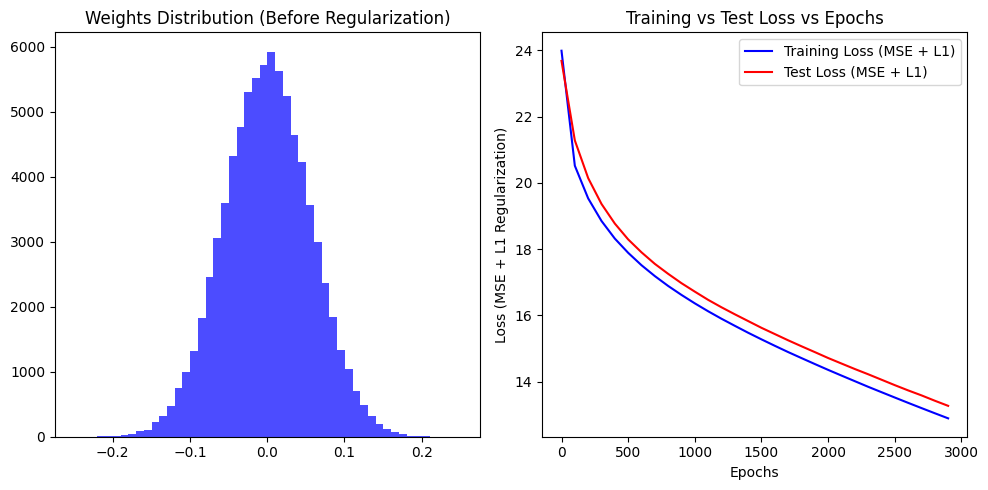

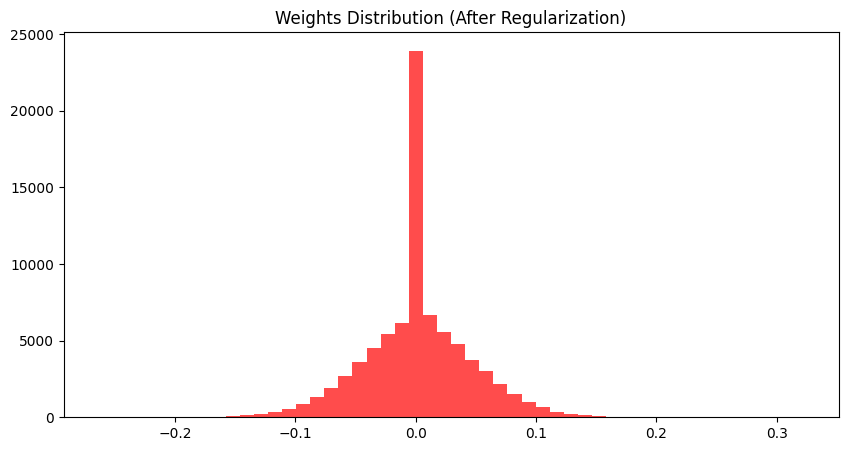

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
test_rna = pd.read_csv('test_set_rna.csv', skip_blank_lines=True)
training_rna = pd.read_csv('training_set_rna.csv', skip_blank_lines=True)
training_protein = pd.read_csv('training_set_adt.csv', skip_blank_lines=True)

# Drop any completely empty columns if present
test_rna = test_rna.dropna(axis=1, how='all')
training_rna = training_rna.dropna(axis=1, how='all')
training_protein = training_protein.dropna(axis=1, how='all')

# Preprocess the data
X_train = training_rna.set_index('Unnamed: 0').T
Y_train = training_protein.set_index('Unnamed: 0').T
X_test = test_rna.set_index('Unnamed: 0').T

# Align features between training and test data this shouldn't do anything unless there are variables that don't exist in both the training and test sets
common_genes = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_genes].values
X_test = X_test[common_genes].values

# Standardize the data...to avoid exploding or vanishing gradients
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0) + 1e-8  # add epsilon to avoid division by zero
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Deep Learning Model using Numpy
input_size = X_train.shape[1]
hidden_size = 128
output_size = Y_train.shape[1]

np.random.seed(42) # This is initializing the weights and biases
weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)#This last part is He initialization
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)#This initialization is because of the relu activation function that was used
bias_output = np.zeros((1, output_size))

# Define hyperparameters
learning_rate = 0.001
epochs = 3000
dropout_rate = 0.3 #regularization to prevent the model from overfitting typically in range of .1-.4
l1_lambda = 0.005 #forces some values to be zero to encourage sparsity/feature selection

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Derivative of Leaky ReLU
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Calculates mean squared error
def compute_mse(predictions, targets):
    return np.mean((predictions - targets) ** 2)

# Custom L1 regularization term
def l1_regularization(weights, lambda_l1):
    return lambda_l1 * np.sum(np.abs(weights))

# To store loss values for plotting
losses = []
test_losses = []

# Plot weights before regularization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(weights_input_hidden.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Weights Distribution (Before Regularization)')

# Training loop
for epoch in range(epochs):
    # Forward pass for training data
    z_hidden = np.dot(X_train, weights_input_hidden) + bias_hidden
    a_hidden = leaky_relu(z_hidden) #computing the hidden layer activation

    # Apply dropout where random matrix is filled with values between 0 and 1
    dropout_mask = (np.random.rand(*a_hidden.shape) > dropout_rate).astype(float)
    a_hidden *= dropout_mask #applying the dropout mask
    a_hidden /= (1 - dropout_rate) #adjusts the activation sum

    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output #matrix multiplication for the output layer with bias added
    predictions = z_output

    # Compute training loss (Mean Squared Error + L1 Regularization)
    train_loss = np.mean((predictions - Y_train.values) ** 2)
    reg_loss = l1_regularization(weights_input_hidden, l1_lambda) + l1_regularization(weights_hidden_output, l1_lambda)
    total_train_loss = train_loss + reg_loss

    # Backward pass for training data
    d_loss_output = 2 * (predictions - Y_train.values) / Y_train.shape[0] #compute the loss gradient for output
    d_weights_hidden_output = np.dot(a_hidden.T, d_loss_output) #compute gradient for weights for hidden layer/output layer
    d_bias_output = np.sum(d_loss_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_loss_output, weights_hidden_output.T) * leaky_relu_derivative(z_hidden) #compute the gradient of the hidden layer only neurons that were activated
    d_weights_input_hidden = np.dot(X_train.T, d_hidden) #computes gradient for weights for input layer/hidden layer
    d_bias_hidden = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights and biases with L1 reg
    weights_input_hidden -= learning_rate * (d_weights_input_hidden + l1_lambda * np.sign(weights_input_hidden)) #subtracts gradient and L1
    bias_hidden -= learning_rate * d_bias_hidden
    weights_hidden_output -= learning_rate * (d_weights_hidden_output + l1_lambda * np.sign(weights_hidden_output)) #subtracts gradient and L1
    bias_output -= learning_rate * d_bias_output

    # Forward pass for test data which computes test predictions
    z_hidden_test = np.dot(X_test, weights_input_hidden) + bias_hidden
    a_hidden_test = leaky_relu(z_hidden_test) #same as for the train so that the loss can be calculated for both
    z_output_test = np.dot(a_hidden_test, weights_hidden_output) + bias_output
    test_predictions = z_output_test

    # Compute test loss (Mean Squared Error + L1 Regularization)
    test_loss = np.mean((test_predictions - predictions[:test_predictions.shape[0], :]) ** 2) + \
                l1_regularization(weights_input_hidden, l1_lambda) + \
                l1_regularization(weights_hidden_output, l1_lambda)

    # Store both losses (train/test)
    if epoch % 100 == 0:
        losses.append(total_train_loss)
        test_losses.append(test_loss)
        print(f"Epoch {epoch}, Train Loss: {total_train_loss}, Test Loss: {test_loss}")

# Plotting training and test loss
plt.subplot(1, 2, 2)
plt.plot(range(0, epochs, 100), losses, label='Training Loss (MSE + L1)', color='blue')
plt.plot(range(0, epochs, 100), test_losses, label='Test Loss (MSE + L1)', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE + L1 Regularization)')
plt.title('Training vs Test Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Check and replace NaN values in weights with zero if present
weights_input_hidden = np.nan_to_num(weights_input_hidden)
weights_hidden_output = np.nan_to_num(weights_hidden_output)

# Plot weights after regularization
plt.figure(figsize=(10, 5))
plt.hist(weights_input_hidden.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Weights Distribution (After Regularization)')
plt.show()

# Predict protein expressions on test set
predicted_proteins = test_predictions

# Ensure no NaN values in predictions
predicted_proteins = np.nan_to_num(predicted_proteins)

### Results & Discussion for Step 2

In the basic numpy approach to a deep learning model, a great deal of hyperparamter tuning/experimentation was conducted in creation of this algorithm, mainly being the number of epochs, the number of layers and amount of neurons in the layers, the dropout rate, the loss evaluation function, the activation function type, and the weight decay metric, referred to as regularization in the plots below. Leaky ReLU as the activation function use, a learning rate of 0.001, the number of epochs at 3000, the dropout rate at 0.3, one hidden layer with 128 neurons, and L1 regularization where lamba is 0.005 resulted in the best Kaggle score of 0.80735. L2 regularization and Elastic Net Regularization were also tried. All acheived similar loss curves. Swish, ReLU, and Sigmoid were other activation functions that were tried, along with mixtures of these. Swish resulted in noticeably increased execution time. Both a Pearson correlation coefficient calculation and a mean squared error (MSE) calculation were tried as loss curves for evaluation of the algorithm. MSE vs Epoch provided an interpretable, visual representation of the data and was decided as the curve to be implemented. Plots were generated to visualize the data before and after L1 regularization was applied as the weigth decay metric. Regularization results in a zero-heavy distribution that elsewise resembles a normal distribution. A plot was generated of MSE vs epoch value for the training and test data. In evaluation of this plot, the lowerest MSE values at the elbow of the curve and overall along the curve meant the hyper paramters were better tuned/a more ideal combination than an iteration with a greater higher MSE values at certain epoch quantities.

### Approach Step 3: PyTorch Deep Learning Implementation

The remainder of the code in this notebook belongs to the PyTorch deep learning implementation for the prediction algorithm. For the PyTorch deep learning approach, the data was to be preprocessed for feature alignment and to ensure non numerical (NaN) entries are replaced by zeros. For PyTorch deep learning algorithm compatibility, the RNA and protein data are to be converted to PyTorch tensors. The TensorDataset is to be used for passing the data through the neural network composed of an input layer, hidden layers, and an otuput layer. An activation function would certainly be applied to the hidden layers, along with dropout, to introduce nonlinearity to the model, to prevent overfitting, and to potentially improve the learning capability and regularization of the neural network. As identified from the previous step, MSE vs epoch will be used as the evaluation of loss in the model. The lower the MSE, the better of a hyperparameter grouping we anticipate having. The MSE vs epoch method of internal cross validation will be drawn from an 80% train and 20% test data split of the training set data. Along with the MSE vs epoch metric, Kaggle submission attempts will be an additional way to evaluate model performance and the tuning of hyper parameter combinations. Reference the Approach section and Results & Discussion section for Step 4 for further detail on the hyper parameter tuning process taken for completion of this algorithm.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
rna_df = pd.read_csv('training_set_rna.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T
adt_df = pd.read_csv('training_set_adt.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T

# Convert to tensors
X = torch.tensor(rna_df.values, dtype=torch.float32)
y = torch.tensor(adt_df.values, dtype=torch.float32)

# Dataset
dataset = TensorDataset(X, y)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size, output_size,
                 dropout_rate1, dropout_rate2, dropout_rate3, alpha):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1_size)
        self.leaky_relu1 = nn.LeakyReLU(negative_slope=alpha)
        self.dropout1 = nn.Dropout(dropout_rate1)

        self.fc2 = nn.Linear(hidden_layer1_size, hidden_layer2_size)
        self.leaky_relu2 = nn.LeakyReLU(negative_slope=alpha)
        self.dropout2 = nn.Dropout(dropout_rate2)

        self.fc3 = nn.Linear(hidden_layer2_size, hidden_layer3_size)
        self.leaky_relu3 = nn.LeakyReLU(negative_slope=alpha)
        self.dropout3 = nn.Dropout(dropout_rate3)

        self.fc4 = nn.Linear(hidden_layer3_size, output_size)

    def forward(self, x):
        x = self.leaky_relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.leaky_relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [ ]:
def train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size, output_size,
                     learning_rate, num_epochs, batch_size, dataset, dropout_rate1, dropout_rate2,
                     dropout_rate3, weight_decay, alpha):
    # DataLoader
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # Initialize Model, Loss, and Optimizer
    model = NeuralNet(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size, output_size,
                      dropout_rate1, dropout_rate2, dropout_rate3, alpha)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Store Losses
    train_mse_per_epoch = []
    test_mse_per_epoch = []

    # Training Loop
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        total_train_samples = 0

        for batch_X, batch_y in train_dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * batch_X.size(0)
            total_train_samples += batch_X.size(0)

        avg_train_loss = running_train_loss / total_train_samples

        # Evaluation
        model.eval()
        running_test_loss = 0.0
        total_test_samples = 0

        with torch.no_grad():
            for batch_X, batch_y in test_dataloader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                running_test_loss += loss.item() * batch_X.size(0)
                total_test_samples += batch_X.size(0)

        avg_test_loss = running_test_loss / total_test_samples

        train_mse_per_epoch.append(avg_train_loss)
        test_mse_per_epoch.append(avg_test_loss)

    return train_mse_per_epoch, test_mse_per_epoch

### Approach Step 4: Hyper Parameter Tuning



The following code regions perform hyper parameter tuning techniques using the algorithm's internal cross validation. The hyper parameters of hidden layer sizes, alpha within the Leaky ReLU activation function, learning rate, batch size, dropout rates, and weight decay/regularization lamba value were tuned for this step. The surrounding hyper parameters selected during their evaluation were often selected in favor of lowered execution time. Hyper parameters such as the number of epochs, the weight decay metric, the activation function(s), and loss evaluation metric were not changed or considered for change based on the experimentation and results of the previosu steps, particularly those identified in Step 2. PCA (as opposed to NMF or another analysis technique), the normalization method, the number of hidden layers, and the selected optimizer did not undergo hyper parameter tuning experimentation either, due to the time constraints for this project.

### Hidden Layer Sizes

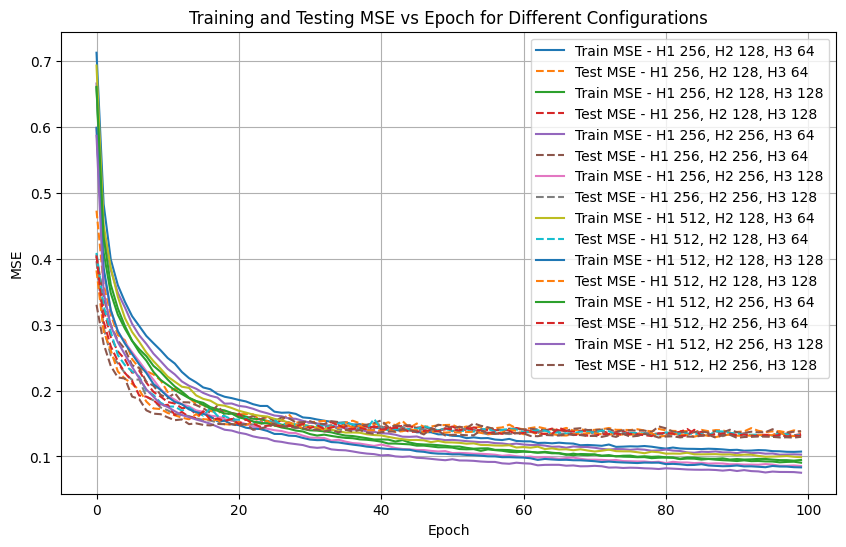

Best configuration: H1 512, H2 256, H3 128 with Test MSE: 0.1297616276997008


In [ ]:
# Hyperparameter Range
hidden_layer1_sizes = [ 256, 512]
hidden_layer2_sizes = [ 128, 256]
hidden_layer3_sizes = [ 64, 128]
learning_rate = 0.0001
num_epochs = 100
batch_size = 32
dropout_rate1 = 0.3
dropout_rate2 = 0.2
dropout_rate3 = 0.2
input_size = 639
output_size = 25
weight_decay = 0.0001
alpha = 0.01

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_config = None

for h1_size in hidden_layer1_sizes:
    for h2_size in hidden_layer2_sizes:
        for h3_size in hidden_layer3_sizes:
            train_mse, test_mse = train_neural_net(input_size, h1_size, h2_size, h3_size, output_size,
                                                   learning_rate, num_epochs, batch_size, dataset,
                                                   dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)
            plt.plot(range(num_epochs), train_mse, label=f'Train MSE - H1 {h1_size}, H2 {h2_size}, H3 {h3_size}')
            plt.plot(range(num_epochs), test_mse, label=f'Test MSE - H1 {h1_size}, H2 {h2_size}, H3 {h3_size}', linestyle='dashed')

            # Track the best configuration
            if test_mse[-1] < best_test_mse:
                best_test_mse = test_mse[-1]
                best_config = (h1_size, h2_size, h3_size)

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Configurations')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best configuration: H1 {best_config[0]}, H2 {best_config[1]}, H3 {best_config[2]} with Test MSE: {best_test_mse}")

### Leaky ReLU Alpha

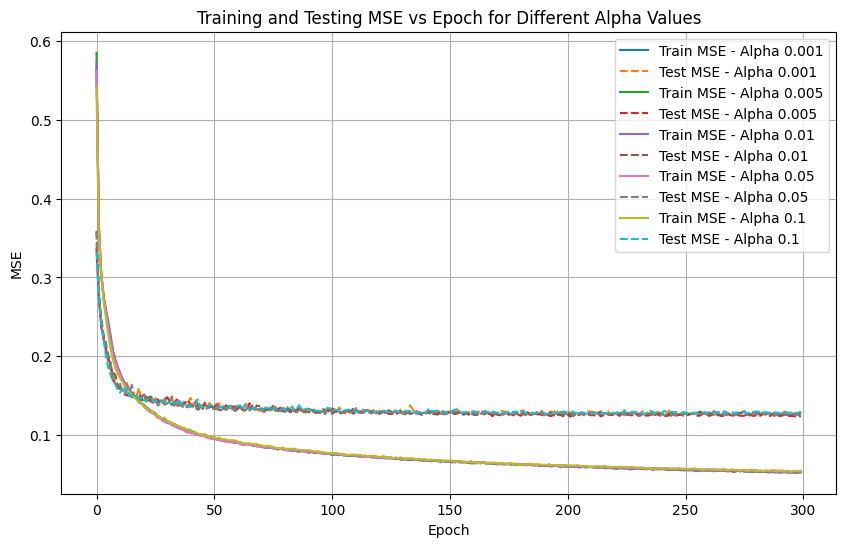

Best Alpha: 0.005 with Test MSE: 0.12352653296103935


In [ ]:
# Hyperparameter Range
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1]
learning_rate = 0.0001
num_epochs = 300
batch_size = 32
dropout_rate1 = 0.3
dropout_rate2 = 0.2
dropout_rate3 = 0.2
input_size = 639
output_size = 25
weight_decay = 0.0001
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_alpha = None

for alpha in alpha_values:
    train_mse, test_mse = train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size,
                                           output_size, learning_rate, num_epochs, batch_size, dataset,
                                           dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)

    plt.plot(range(num_epochs), train_mse, label=f'Train MSE - Alpha {alpha}')
    plt.plot(range(num_epochs), test_mse, label=f'Test MSE - Alpha {alpha}', linestyle='dashed')

    # Track the best configuration
    if test_mse[-1] < best_test_mse:
        best_test_mse = test_mse[-1]
        best_alpha = alpha

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Alpha: {best_alpha} with Test MSE: {best_test_mse}")


### Learning Rate

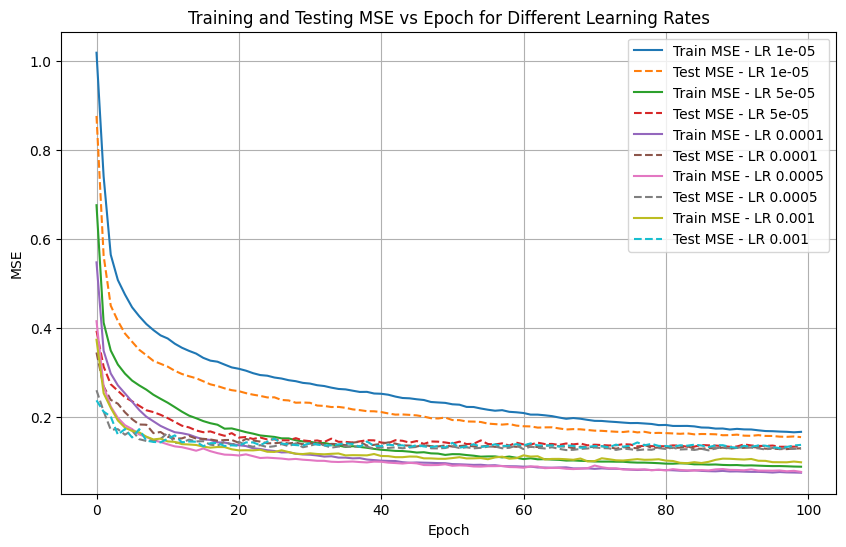

Best Learning Rate: 0.0005 with Test MSE: 0.12969253417778848


In [ ]:
# Hyperparameters
learning_rate_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
num_epochs = 100
batch_size = 32
dropout_rate1 = 0.3
dropout_rate2 = 0.2
dropout_rate3 = 0.2
input_size = 639
output_size = 25
weight_decay = 0.0001
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
alpha = 0.005

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_learning_rate = None

for learning_rate in learning_rate_values:
    train_mse, test_mse = train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size,
                                           output_size, learning_rate, num_epochs, batch_size, dataset,
                                           dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)

    plt.plot(range(num_epochs), train_mse, label=f'Train MSE - LR {learning_rate}')
    plt.plot(range(num_epochs), test_mse, label=f'Test MSE - LR {learning_rate}', linestyle='dashed')

    # Track the best configuration
    if test_mse[-1] < best_test_mse:
        best_test_mse = test_mse[-1]
        best_learning_rate = learning_rate

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Learning Rate: {best_learning_rate} with Test MSE: {best_test_mse}")


### Batch Size

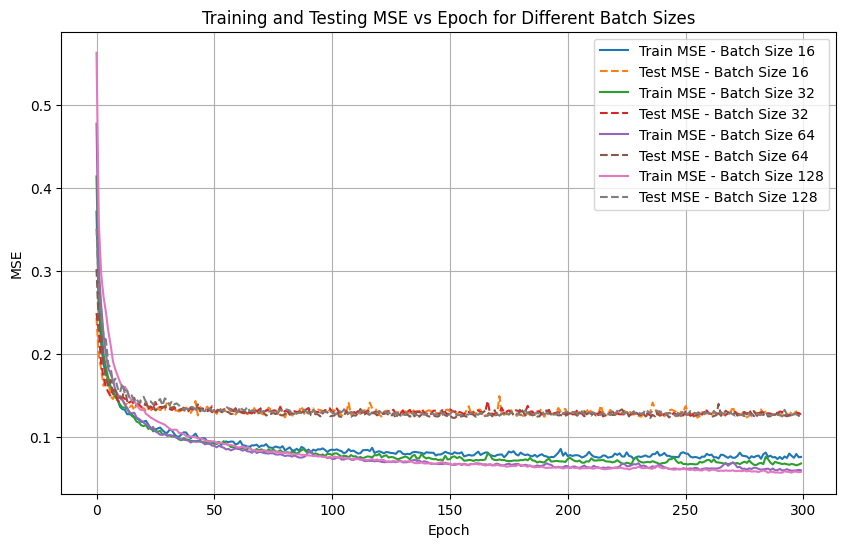

Best Batch Size: 64 with Test MSE: 0.12521536019485394


In [ ]:
# Hyperparameter Range
batch_size_values = [16, 32, 64, 128]
num_epochs = 300
dropout_rate1 = 0.3
dropout_rate2 = 0.2
dropout_rate3 = 0.2
input_size = 639
output_size = 25
weight_decay = 0.0001
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
alpha = 0.005
learning_rate = 0.0005

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_batch_size = None

for batch_size in batch_size_values:
    train_mse, test_mse = train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size,
                                           output_size, learning_rate, num_epochs, batch_size, dataset,
                                           dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)

    plt.plot(range(num_epochs), train_mse, label=f'Train MSE - Batch Size {batch_size}')
    plt.plot(range(num_epochs), test_mse, label=f'Test MSE - Batch Size {batch_size}', linestyle='dashed')

    # Track the best configuration
    if test_mse[-1] < best_test_mse:
        best_test_mse = test_mse[-1]
        best_batch_size = batch_size

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Batch Size: {best_batch_size} with Test MSE: {best_test_mse}")

### Dropout Rates

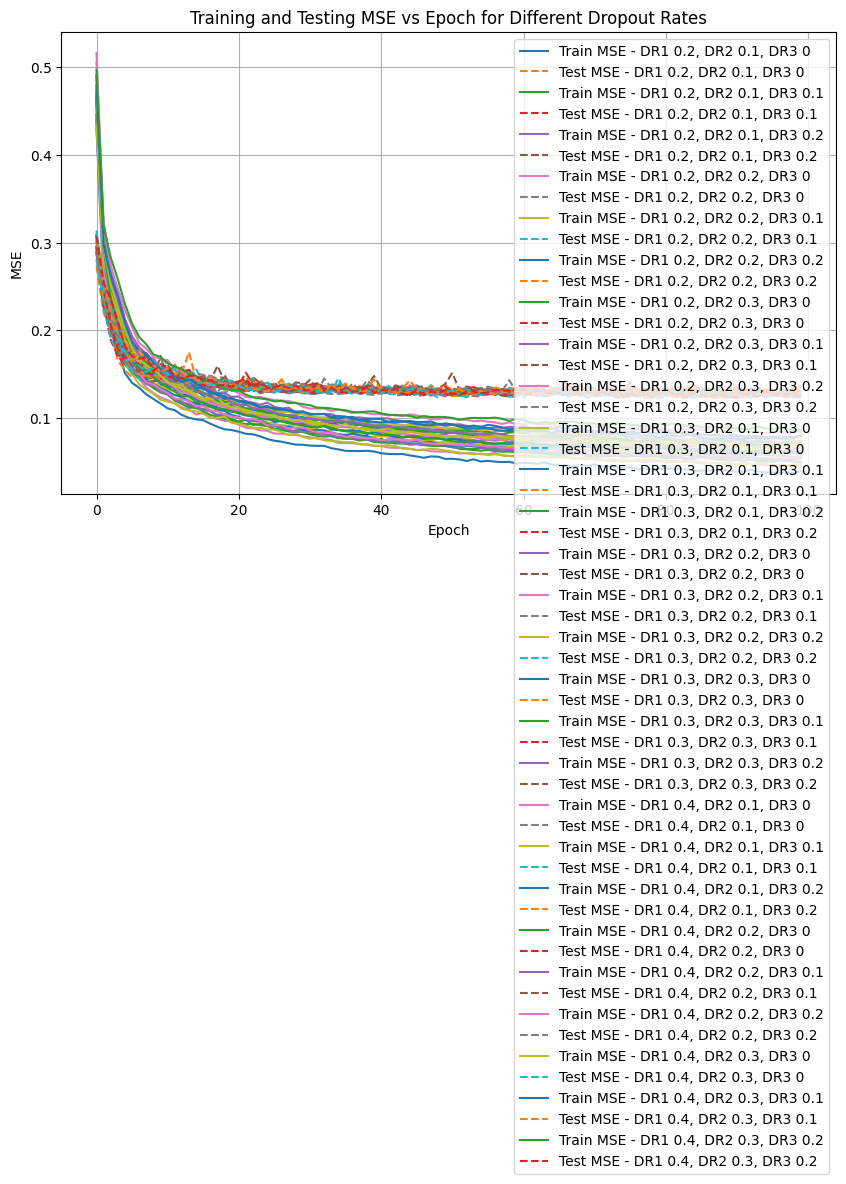

Best Dropout Rates: DR1 0.4, DR2 0.3, DR3 0.2 with Test MSE: 0.12188753223374542


In [ ]:
# Hyperparameter Range
dropout_rate1_values = [ 0.2, 0.3, 0.4]
dropout_rate2_values = [0.1,0.2, 0.3]
dropout_rate3_values = [0, 0.1, 0.2]
num_epochs = 100
batch_size = 64
input_size = 639
output_size = 25
weight_decay = 0.0001
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
alpha = 0.005
learning_rate = 0.0005

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_dropout_rates = None

for dropout_rate1 in dropout_rate1_values:
    for dropout_rate2 in dropout_rate2_values:
        for dropout_rate3 in dropout_rate3_values:
            train_mse, test_mse = train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size,
                                                   output_size, learning_rate, num_epochs, batch_size, dataset,
                                                   dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)

            plt.plot(range(num_epochs), train_mse, label=f'Train MSE - DR1 {dropout_rate1}, DR2 {dropout_rate2}, DR3 {dropout_rate3}')
            plt.plot(range(num_epochs), test_mse, label=f'Test MSE - DR1 {dropout_rate1}, DR2 {dropout_rate2}, DR3 {dropout_rate3}', linestyle='dashed')

            # Track the best configuration
            if test_mse[-1] < best_test_mse:
                best_test_mse = test_mse[-1]
                best_dropout_rates = (dropout_rate1, dropout_rate2, dropout_rate3)

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Dropout Rates')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Dropout Rates: DR1 {best_dropout_rates[0]}, DR2 {best_dropout_rates[1]}, DR3 {best_dropout_rates[2]} with Test MSE: {best_test_mse}")


### Weight Decay/ Regularization Lamba Value

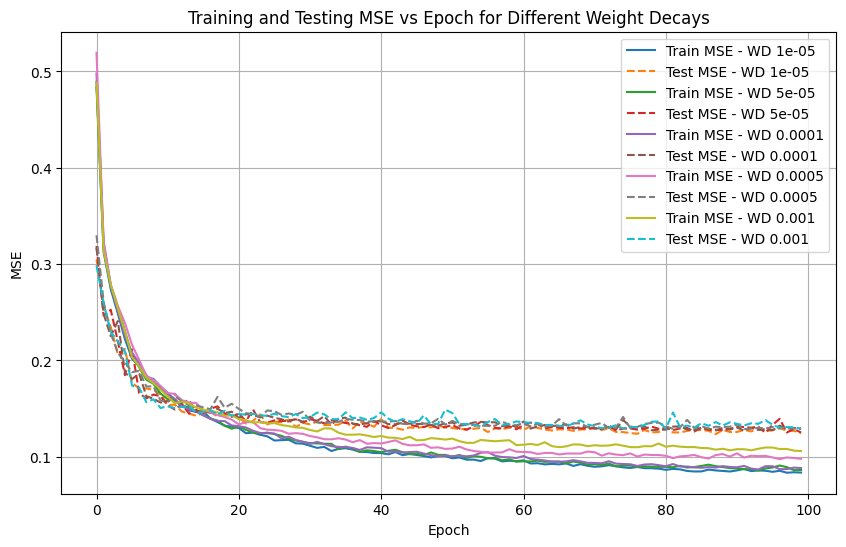

Best Weight Decay: 1e-05 with Test MSE: 0.12453984622651718


In [ ]:
# Hyperparameter Range
weight_decay_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
num_epochs = 100
batch_size = 64
input_size = 639
output_size = 25
hidden_layer1_size = 512
hidden_layer2_size = 256
hidden_layer3_size = 128
alpha = 0.005
learning_rate = 0.0005
dropout_rate1 = 0.4
dropout_rate2 = 0.3
dropout_rate3 = 0.2

# Plot Results
plt.figure(figsize=(10, 6))

best_test_mse = float('inf')
best_weight_decay = None

for weight_decay in weight_decay_values:
    train_mse, test_mse = train_neural_net(input_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size,
                                           output_size, learning_rate, num_epochs, batch_size, dataset,
                                           dropout_rate1, dropout_rate2, dropout_rate3, weight_decay, alpha)

    plt.plot(range(num_epochs), train_mse, label=f'Train MSE - WD {weight_decay}')
    plt.plot(range(num_epochs), test_mse, label=f'Test MSE - WD {weight_decay}', linestyle='dashed')

    # Track the best configuration
    if test_mse[-1] < best_test_mse:
        best_test_mse = test_mse[-1]
        best_weight_decay = weight_decay

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs Epoch for Different Weight Decays')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Weight Decay: {best_weight_decay} with Test MSE: {best_test_mse}")


### Results & Discussion for Steps 3 and 4

This hyperparameter tuning is likely impacted by the order with which they were tuned because most hyperparameters are not completely independent. For example, the optimal dropout rate is relative to the hidden layer sizes. It is also important to note when looking for the optimal hyperparameters the test MSE is the important value to consider. Many of the hyperparameters have a very similar test MSE with one of the largest differences being the dropout rate and regularization.

### Results

The optimal hyperparameters for the PyTorch deep learning implementation were as follows:

*   epoch size: 1000
*   hidden layer size: 512/256/128
*   learning rate: 0.0005
*   batch size: 64
*   dropout rate1: 0.4
*   dropout rate2: 0.3
*   dropout rate3: 0.2
*   L2 weight decay/regularization lambda: 0.001
*   Leaky ReLU alpha: 0.005

These are the hyperparameters based on a deep learning model with 3 hidden layers, leaky ReLU as the activation function, and the adam optimizer.


### Final Model with Optimal Hyper Parameters

Best Kaggle Score: 0.84697

Training complete.


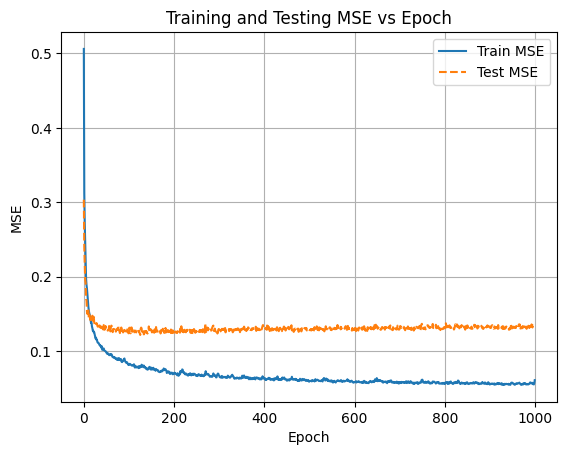

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # For normalization
from sklearn.decomposition import PCA  # For PCA

# Load data
rna_df = pd.read_csv('training_set_rna.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T
adt_df = pd.read_csv('training_set_adt.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T

# Convert to tensors after PCA transformation
X = torch.tensor(rna_df.values, dtype=torch.float32)
y = torch.tensor(adt_df.values, dtype=torch.float32)

# Dataset
dataset = TensorDataset(X, y)

# Split dataset into 80% train and 20% test
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create DataLoaders
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate1, dropout_rate2, dropout_rate3):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.leaky_relu1 = nn.LeakyReLU(negative_slope=0.005)
        self.dropout1 = nn.Dropout(dropout_rate1)

        self.fc2 = nn.Linear(512, 256)
        self.leaky_relu2 = nn.LeakyReLU(negative_slope=0.005)
        self.dropout2 = nn.Dropout(dropout_rate2)

        self.fc3 = nn.Linear(256, 128)
        self.leaky_relu3 = nn.LeakyReLU(negative_slope=0.005)
        self.dropout3 = nn.Dropout(dropout_rate3)

        self.fc4 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.leaky_relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.leaky_relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
# Hyperparameters
input_size = 639
output_size = 25
learning_rate = 0.0005
num_epochs = 1000
k_folds = 5
dropout_rate1 = 0.4
dropout_rate2 = 0.3
dropout_rate3 = 0.2
# Model, Loss, Optimizer
model = NeuralNet(input_size, output_size, dropout_rate1, dropout_rate2, dropout_rate3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001)  # L2 regularization
# Training loop for each fold
train_mse_per_epoch = []
test_mse_per_epoch = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    total_train_samples = 0  # Track total samples in the training set

    # Training phase
    for batch_X, batch_y in train_dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()  # Backpropagate the loss
        optimizer.step()

        # Multiply loss by the batch size
        running_train_loss += loss.item() * batch_X.size(0)
        total_train_samples += batch_X.size(0)  # Count the samples

    # Average training loss
    avg_train_loss = running_train_loss / total_train_samples

    # Evaluation phase
    model.eval()
    running_test_loss = 0.0
    total_test_samples = 0

    with torch.no_grad():
        for batch_X, batch_y in test_dataloader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Multiply loss by the batch size
            running_test_loss += loss.item() * batch_X.size(0)
            total_test_samples += batch_X.size(0)

    # Average test loss
    avg_test_loss = running_test_loss / total_test_samples

    train_mse_per_epoch.append(avg_train_loss)
    test_mse_per_epoch.append(avg_test_loss)

print("Training complete.")
# Plotting MSE for both training and testing
plt.plot(range(num_epochs), train_mse_per_epoch, label='Train MSE')
plt.plot(range(num_epochs), test_mse_per_epoch, label='Test MSE', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Testing MSE vs Epoch')
plt.grid(True)
plt.show()

###Final With PCA

Best Kaggle Score: 0.84550

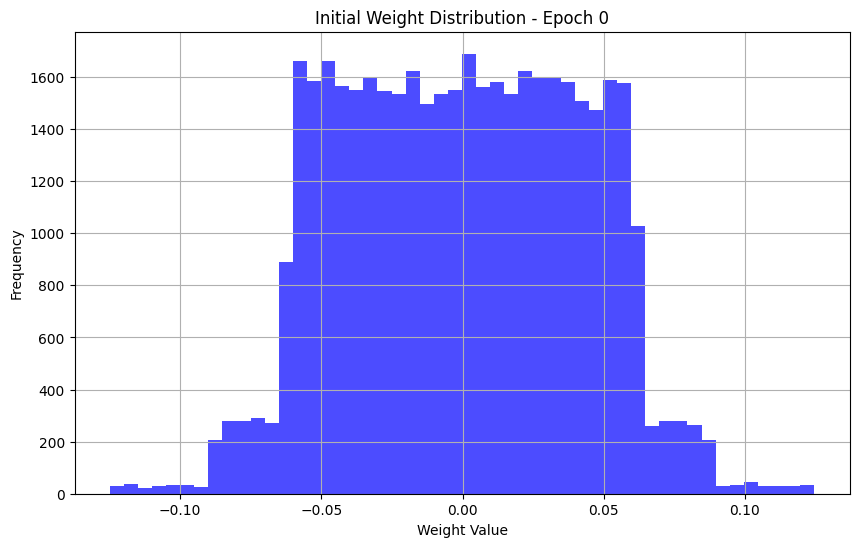

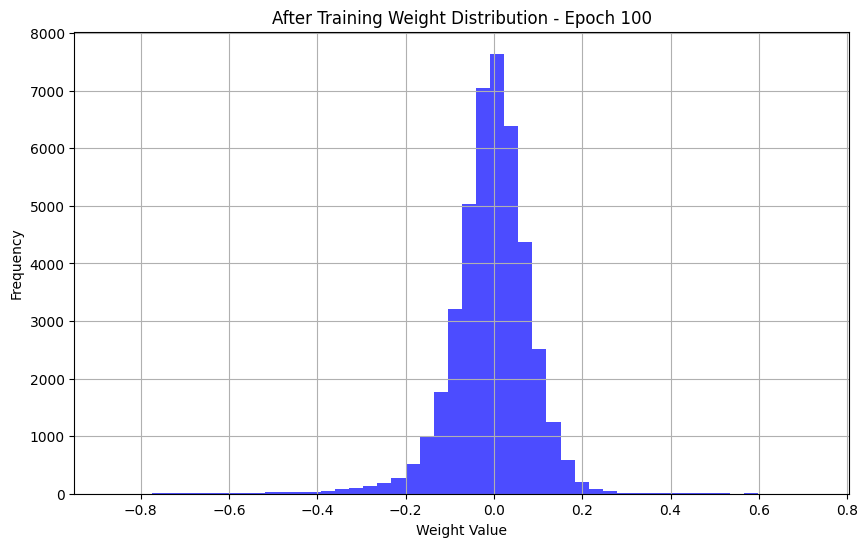

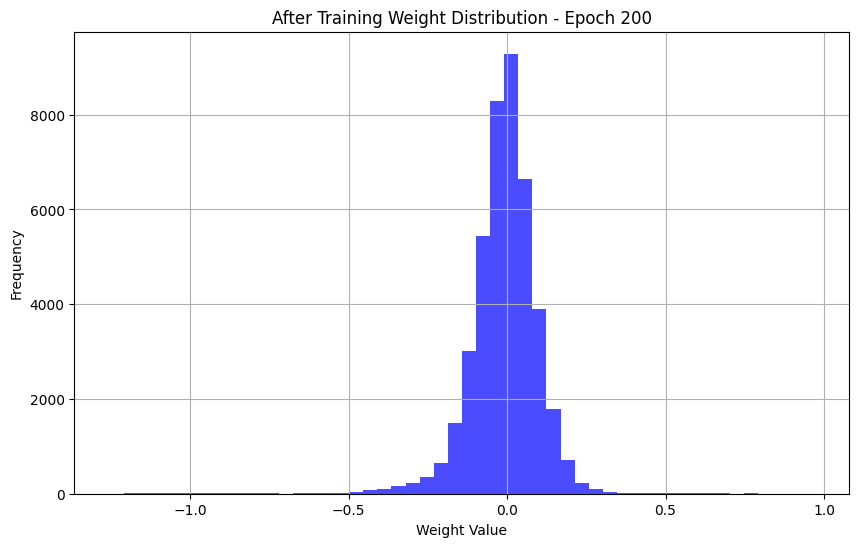

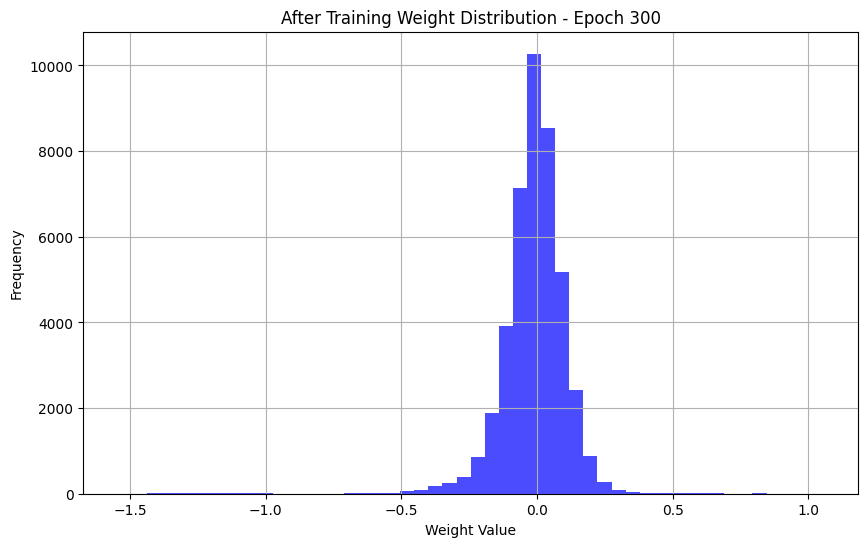

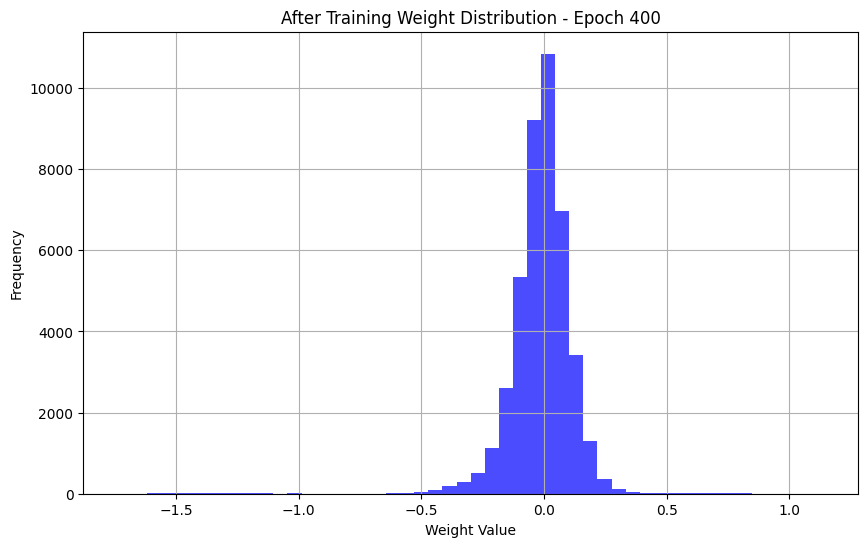

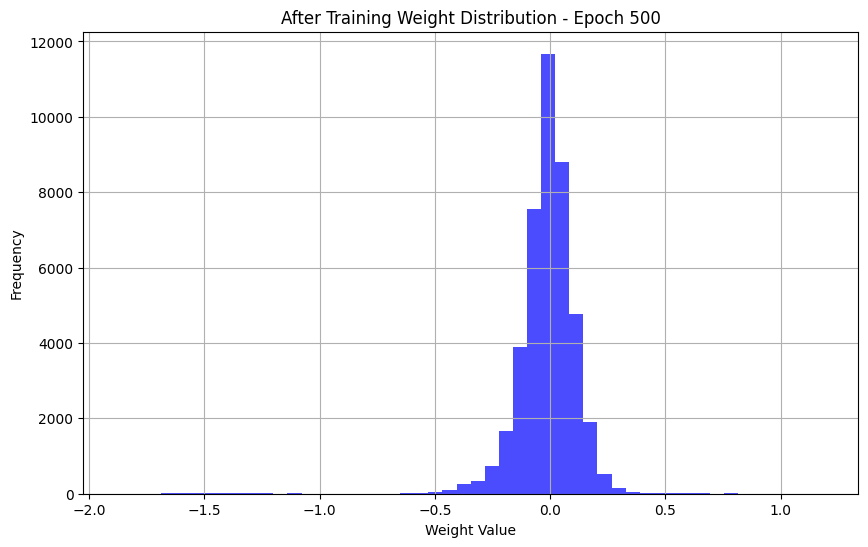

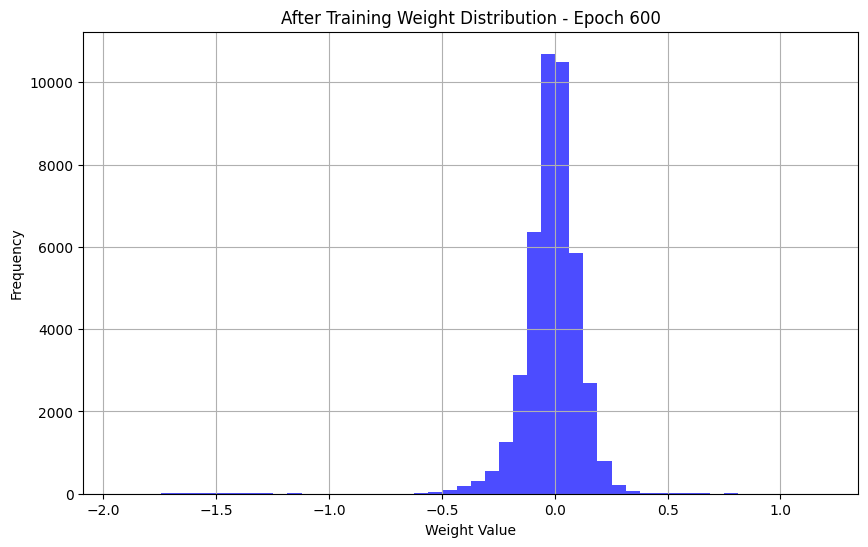

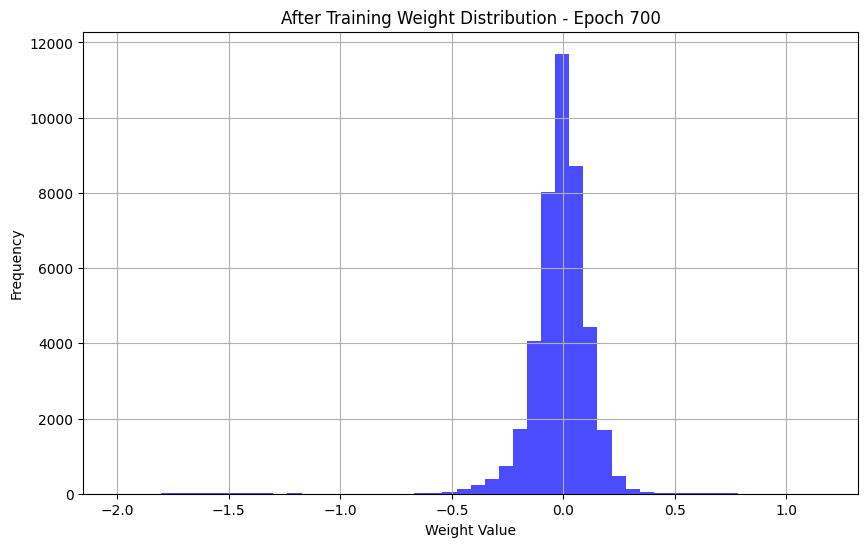

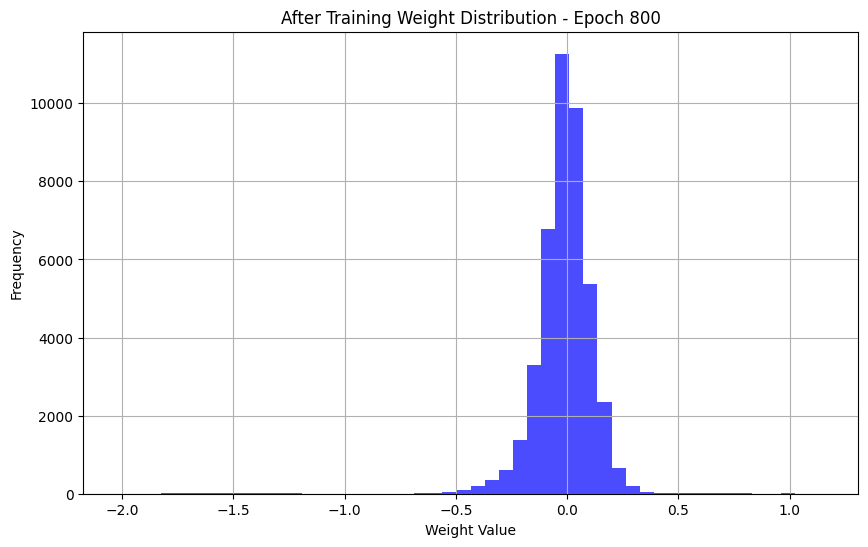

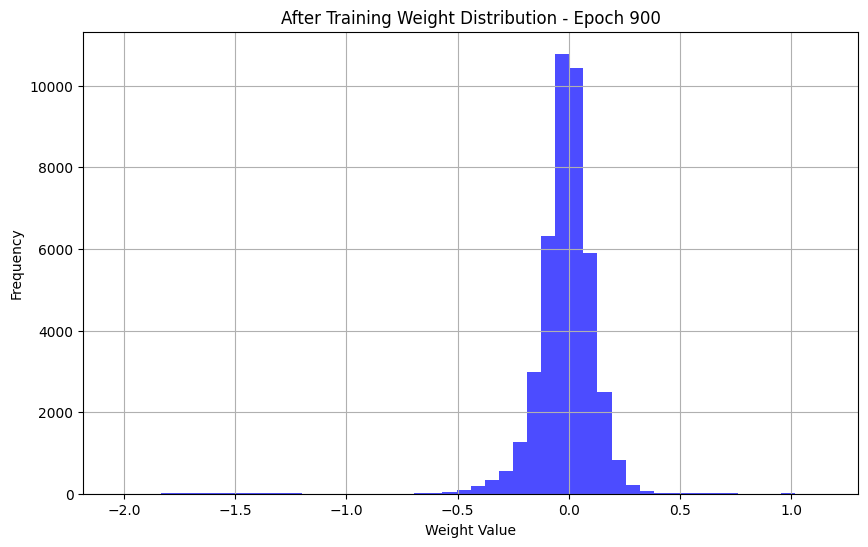

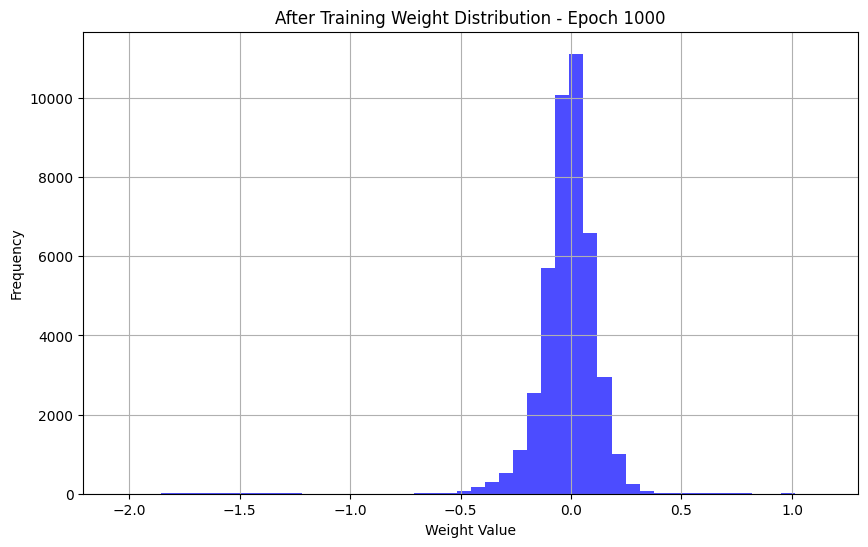

Training complete.


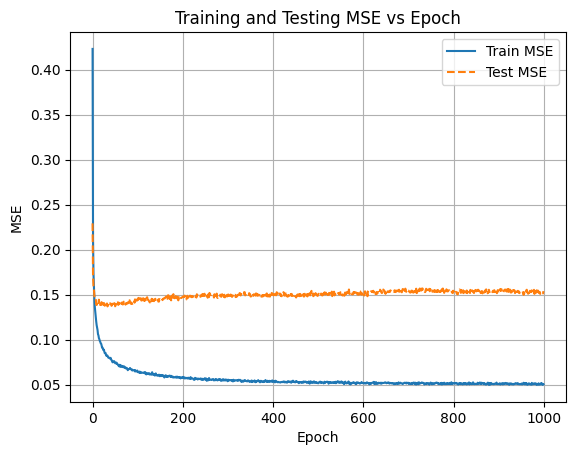

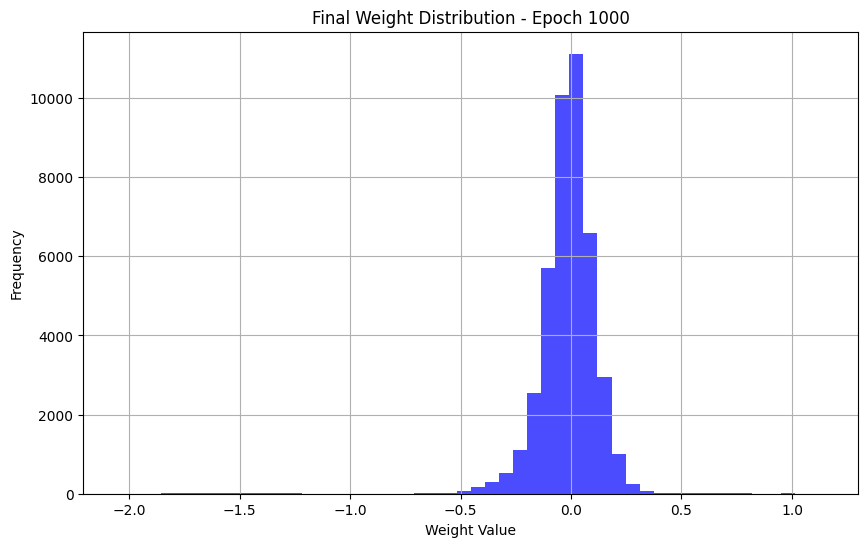

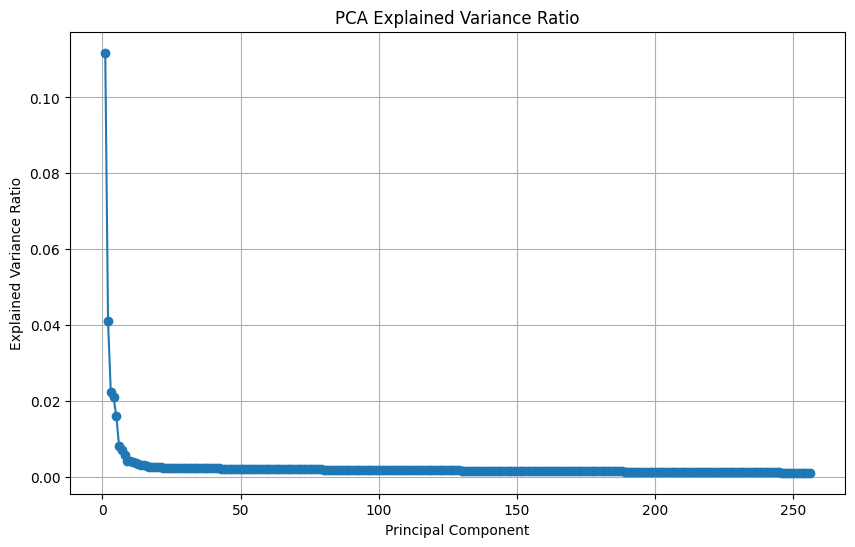

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # For normalization
from sklearn.decomposition import PCA  # For PCA

# Load data
rna_df = pd.read_csv('training_set_rna.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T
adt_df = pd.read_csv('training_set_adt.csv').apply(pd.to_numeric, errors='coerce').fillna(0).T

# Normalize data (Standardization)
scaler = StandardScaler()
rna_df_normalized = pd.DataFrame(scaler.fit_transform(rna_df), columns=rna_df.columns)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=256)  # You can adjust the number of components
rna_df_pca = pca.fit_transform(rna_df_normalized)

# Convert to tensors after PCA transformation
X = torch.tensor(rna_df_pca, dtype=torch.float32)
y = torch.tensor(adt_df.values, dtype=torch.float32)

# Dataset
dataset = TensorDataset(X, y)

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate1=0.2, dropout_rate2=0.1):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.leaky_relu1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(dropout_rate1)
        self.fc2 = nn.Linear(128, 64)
        self.leaky_relu2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(dropout_rate2)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.leaky_relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = rna_df_pca.shape[1]  # Set input_size to the number of PCA components
output_size = 25
learning_rate = 0.001
num_epochs = 1000
batch_size = 32
k_folds = 5

# Cross Validation storage
train_mse_per_epoch = []
test_mse_per_epoch = []

# Split dataset into 80% train and 20% test
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Model, Loss, Optimizer
model = NeuralNet(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)  # L2 regularization

# Track the weight distributions
def plot_weight_distribution(model, epoch, title_prefix):
    # Extract weights from all layers
    weights = []
    for param in model.parameters():
        if param.requires_grad:
            weights.append(param.data.view(-1))  # Flatten the weights
    all_weights = torch.cat(weights)  # Concatenate all the flattened weights

    # Plot histogram of the weights
    plt.figure(figsize=(10, 6))
    plt.hist(all_weights.cpu().numpy(), bins=50, color='blue', alpha=0.7)
    plt.title(f'{title_prefix} Weight Distribution - Epoch {epoch}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Initial weight distribution (before training)
plot_weight_distribution(model, 0, "Initial")

# Training loop for each fold
train_mse_per_epoch = []
test_mse_per_epoch = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    running_test_loss = 0.0

    for batch_X, batch_y in train_dataloader:  # Use train_dataloader here
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()  # Backpropagate the loss
        optimizer.step()
        running_train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in test_dataloader:  # Use test_dataloader here
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_test_loss += loss.item()

    # Compute average losses for the current epoch
    avg_train_loss = running_train_loss / len(train_dataloader)
    avg_test_loss = running_test_loss / len(test_dataloader)

    train_mse_per_epoch.append(avg_train_loss)
    test_mse_per_epoch.append(avg_test_loss)

    # Optionally plot the weight distribution at every 100 epochs
    if (epoch + 1) % 100 == 0:
        plot_weight_distribution(model, epoch + 1, "After Training")

print("Training complete.")

# Plotting MSE for both training and testing
plt.plot(range(num_epochs), train_mse_per_epoch, label='Train MSE')
plt.plot(range(num_epochs), test_mse_per_epoch, label='Test MSE', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Testing MSE vs Epoch')
plt.grid(True)
plt.show()

# Final weight distribution after all epochs
plot_weight_distribution(model, num_epochs, "Final")

# Plot PCA explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

When PCA is not implemented:

In [ ]:
rna_test = pd.read_csv('test_set_rna.csv').T
k = rna_test.apply(pd.to_numeric, errors='coerce').fillna(0)
k = torch.tensor(k.values, dtype=torch.float32)

with torch.no_grad():
    model.eval()
    predictions = model(k)
    predictions = torch.nan_to_num(predictions).numpy()

# This is the part that needed to be changed I can explain it on the phone today
predictions_flat = predictions.flatten()[25:]

# Create identifiers
identifiers = [f"ID_{i+1}" for i in range(len(predictions_flat))]

# Save to CSV
predicted_proteins_df = pd.DataFrame({'Id': identifiers, 'Expected': predictions_flat})
predicted_proteins_df.to_csv('predicted_protein_expressions.csv', index=False)

print("Predictions saved to 'predicted_protein_expressions.csv'")


Predictions saved to 'predicted_protein_expressions.csv'


For when PCA is implemented:

In [ ]:
# Load the test data
rna_test = pd.read_csv('test_set_rna.csv').T
rna_test = rna_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Normalize the test data using the same scaler used for the training data
rna_test_normalized = scaler.transform(rna_test)

# Apply PCA transformation using the same PCA fitted to the training data
rna_test_pca = pca.transform(rna_test_normalized)

# Convert the test data to a tensor
k = torch.tensor(rna_test_pca, dtype=torch.float32)

# Generate predictions
with torch.no_grad():
    model.eval()
    predictions = model(k)
    predictions = torch.nan_to_num(predictions).numpy()

# Flatten the predictions array (25 predicted values for each test sample)
predictions_flat = predictions.flatten()

# This is the part that needed to be changed I can explain it on the phone today
predictions_flat = predictions.flatten()[25:]

# Create identifiers for the output CSV. This time, each row has a unique ID.
identifiers = [f"ID_{i+1}" for i in range(len(predictions_flat))]

# Prepare the submission DataFrame
submission_data = {
    'Id': identifiers,
    'Expected': predictions_flat
}

# Create the DataFrame for submission
submission_df = pd.DataFrame(submission_data)

# Save to CSV
submission_df.to_csv('predicted_protein_expressions.csv', index=False)

print("Predictions saved to 'predicted_protein_expressions.csv'")

Predictions saved to 'predicted_protein_expressions.csv'


### Summary of Results

The best Kaggle score (Pearson Correlation Coefficient) obtained was 0.80225 using linear multivariation, 0.80735 for deep learning using numpy, and 0.847 for deep learning using Pytorch. For all three steps, various hyperparameter tuning/experimentation was conducted for the models. This included, for instance, normalization method, the number of neuorns in a layer, the number of layers, which activation functions were used, the use of layer normalization or batch normalization or dropout, which loss function was used, which optimizer was used, which weight decay metric was used, the number of epochs, and the learning rate. The specific hyperparameters that were selected as the most optimal combinations from our experimentation are listed above. It was found that with and without PCA implementations gave very comparable results. The best Kaggle score was found without PCA, but with more time to adjust hyper parameters in the PCA method, there was certainly potential for a higher score there.

### Conclusion

For the final model we were able to optimize the hyperparameters given the activation function that was used. For ways to improve the model I think changing the activation function could potentially improve the pearson correlation, as this was not a hyper parameter that we selected for tuning, due to limited project time. The other way that could potentially improve the model would be changing the threshold/alpha for each layer of the hidden layers. Since there are 3 hidden layers we could have adjusted it to have 3 different activation functions or 3 different alpha values for them. The biggest challenge we faced was creating the deep learning model using numpy. Anything that was more complicated than 1 hidden layer with the relu activation function seemed to perform far worse. We began using pytorch the final week and found the code to be a lot more intuitive. We believe had we used pytorch from the start we could have been able to spend more time on improving the model rather than troubleshooting the code. Moving forward we will further familiarize ourselves with pytorch for deep learning.